In [ ]:
import tensorflow as tf
import os
data_dir="/content/drive/MyDrive/ProjeKe/spectrograms/"
import cv2
import random


In [ ]:
folder_list=[x for x in os.listdir(data_dir)]
folder_list

['6', '5', '2', '1', '3', '8', '9', '0', '4', '7']

In [ ]:
deneme=[]
for i in folder_list:
  path=data_dir+i
  img_list=[x for x in os.listdir(path)]
  for a in img_list:
    deneme.append(a)

In [ ]:
deneme[0]

'102305-6-0-0.png'

In [ ]:
image_list=list(range(0,len(deneme)))
random.shuffle(image_list)
train=image_list[:6986]
val=image_list[6986:7685]
test=image_list[7685:]
# Burada imlerin uzunluğu kadar bir liste oluşturup shuffle işlemiyorum çünkü indislerin karışık gelmesiyle train test ve val arasındaki denge daha iyi dağılabilir diye düşündüm.


In [ ]:
# İkinci çalıştırmada Buraların(bun vebundan sonraki 2 cell) çalışmasına gerek yoktur.
for x in train:
  class_name=deneme[x].split("-")[1]
  if (os.path.exists("/content/drive/MyDrive/ProjeKe/train/"+class_name)==False):
    os.mkdir("/content/drive/MyDrive/ProjeKe/train/"+class_name)
    img=cv2.imread("/content/drive/MyDrive/ProjeKe/spectrograms/"+class_name+"/"+deneme[x])
    cv2.imwrite("/content/drive/MyDrive/ProjeKe/train/"+class_name+"/"+deneme[x],img)

  else:
    img=cv2.imread("/content/drive/MyDrive/ProjeKe/spectrograms/"+class_name+"/"+deneme[x])
    cv2.imwrite("/content/drive/MyDrive/ProjeKe/train/"+class_name+"/"+deneme[x],img)
 


In [ ]:

for x in val:
  class_name=deneme[x].split("-")[1]
  if (os.path.exists("/content/drive/MyDrive/ProjeKe/val/"+class_name)==False):
    os.mkdir("/content/drive/MyDrive/ProjeKe/val/"+class_name)
    img=cv2.imread("/content/drive/MyDrive/ProjeKe/spectrograms/"+class_name+"/"+deneme[x])
    cv2.imwrite("/content/drive/MyDrive/ProjeKe/val/"+class_name+"/"+deneme[x],img)

  else:
    img=cv2.imread("/content/drive/MyDrive/ProjeKe/spectrograms/"+class_name+"/"+deneme[x])
    cv2.imwrite("/content/drive/MyDrive/ProjeKe/val/"+class_name+"/"+deneme[x],img)
 
    


In [ ]:

for x in test:
  class_name=deneme[x].split("-")[1]
  if (os.path.exists("/content/drive/MyDrive/ProjeKe/test/"+class_name)==False):
    os.mkdir("/content/drive/MyDrive/ProjeKe/test/"+class_name)
    img=cv2.imread("/content/drive/MyDrive/ProjeKe/spectrograms/"+class_name+"/"+deneme[x])
    cv2.imwrite("/content/drive/MyDrive/ProjeKe/test/"+class_name+"/"+deneme[x],img)
  else:
    img=cv2.imread("/content/drive/MyDrive/ProjeKe/spectrograms/"+class_name+"/"+deneme[x])
    cv2.imwrite("/content/drive/MyDrive/ProjeKe/test/"+class_name+"/"+deneme[x],img) 
    

In [ ]:
import shutil
# Burada Test Klasörünü silip val içerisine aktarıyorum Datagen içerisinde ayırma işlemi gerçekleştirdim.
img_list=[x for x in os.listdir("/content/drive/MyDrive/ProjeKe/val/denss")]
for i in img_list:
  img_path="/content/drive/MyDrive/ProjeKe/val/denss/"+i
  shutil.move(img_path,"/content/drive/MyDrive/ProjeKe/val/5/"+i)




# **Model**

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D,Conv2D,Input,Concatenate,ZeroPadding2D,Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.applications import DenseNet121


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_gen=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,validation_split=0.2)

train_df=train_gen.flow_from_directory("/content/drive/MyDrive/ProjeKe/train/",
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    )

val_df=val_gen.flow_from_directory("/content/drive/MyDrive/ProjeKe/val/",
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    subset="training"

    )
test_df=val_gen.flow_from_directory("/content/drive/MyDrive/ProjeKe/val/",
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    subset="validation"

    )

# Buradan sonra model oluşturma eğitim ve değerlendirmeler kalıyor.

Found 6986 images belonging to 10 classes.
Found 1400 images belonging to 10 classes.
Found 346 images belonging to 10 classes.


In [ ]:
inp=Input(shape=(64,64,1))
x=Conv2D(16,kernel_size=(3,3),strides=(1,1),activation='relu',padding="same")(inp)
x=Conv2D(32,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same")(x)
x=Conv2D(64,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same")(x)
x=Conv2D(128,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same")(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dense(64,activation='relu')(x)
out=Dense(10,activation='softmax')(x)
model_s=Model(inputs=inp,outputs=out)
model_s.summary()
model_s.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 16)        160       
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                          

In [ ]:
model_s.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer="Adam", metrics=["accuracy"])

In [ ]:
callback=[EarlyStopping(monitor='val_loss',patience=10), ModelCheckpoint(filepath="best_model.h5",monitor='val_loss',save_best_only=True)]


In [ ]:
result=model_s.fit(
    train_df,
    steps_per_epoch=train_df.samples//32,
    validation_data=val_df,
    epochs=50,
    validation_steps=val_df.samples//32,
    #callbacks=callback
)

Epoch 1/50
218/218 [==============================] - 49s 220ms/step - loss: 1.6595 - accuracy: 0.3976 - val_loss: 1.4426 - val_accuracy: 0.4789
Epoch 2/50
218/218 [==============================] - 47s 217ms/step - loss: 1.1990 - accuracy: 0.5781 - val_loss: 1.0892 - val_accuracy: 0.6206
Epoch 3/50
218/218 [==============================] - 48s 220ms/step - loss: 0.9452 - accuracy: 0.6789 - val_loss: 0.8623 - val_accuracy: 0.6948
Epoch 4/50
218/218 [==============================] - 47s 218ms/step - loss: 0.7769 - accuracy: 0.7330 - val_loss: 0.8732 - val_accuracy: 0.7042
Epoch 5/50
218/218 [==============================] - 47s 214ms/step - loss: 0.6568 - accuracy: 0.7794 - val_loss: 0.7890 - val_accuracy: 0.7420
Epoch 6/50
218/218 [==============================] - 47s 218ms/step - loss: 0.5969 - accuracy: 0.7990 - val_loss: 0.6894 - val_accuracy: 0.7725
Epoch 7/50
218/218 [==============================] - 47s 214ms/step - loss: 0.5250 - accuracy: 0.8213 - val_loss: 0.7248 - val_ac

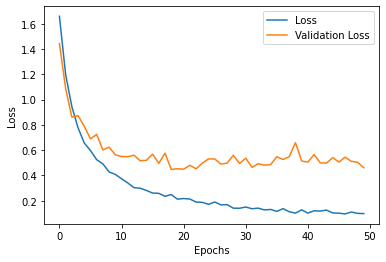

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result.history["loss"],label="Loss")
plt.plot(result.history["val_loss"],label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

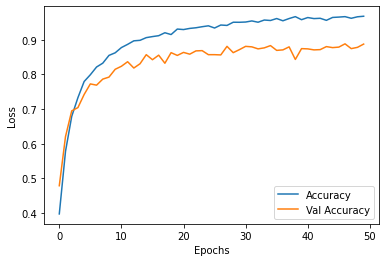

In [ ]:
plt.plot(result.history["accuracy"],label="Accuracy")
plt.plot(result.history["val_accuracy"],label="Val Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

In [ ]:
score=model_s.evaluate(test_df,steps=test_df.samples)
print("test loss",score[0])
print("test Accuracy",score[1])

 11/346 [..............................] - ETA: 56s - loss: 0.4897 - accuracy: 0.8757

346/346 [==============================] - 2s 5ms/step - loss: 0.4897 - accuracy: 0.8757
test loss 0.4897192418575287
test Accuracy 0.8757225275039673


In [ ]:
import numpy as np
y_pred=model_s.predict(test_df)
predict_classes=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
matrix = cm(test_df.classes, predict_classes)


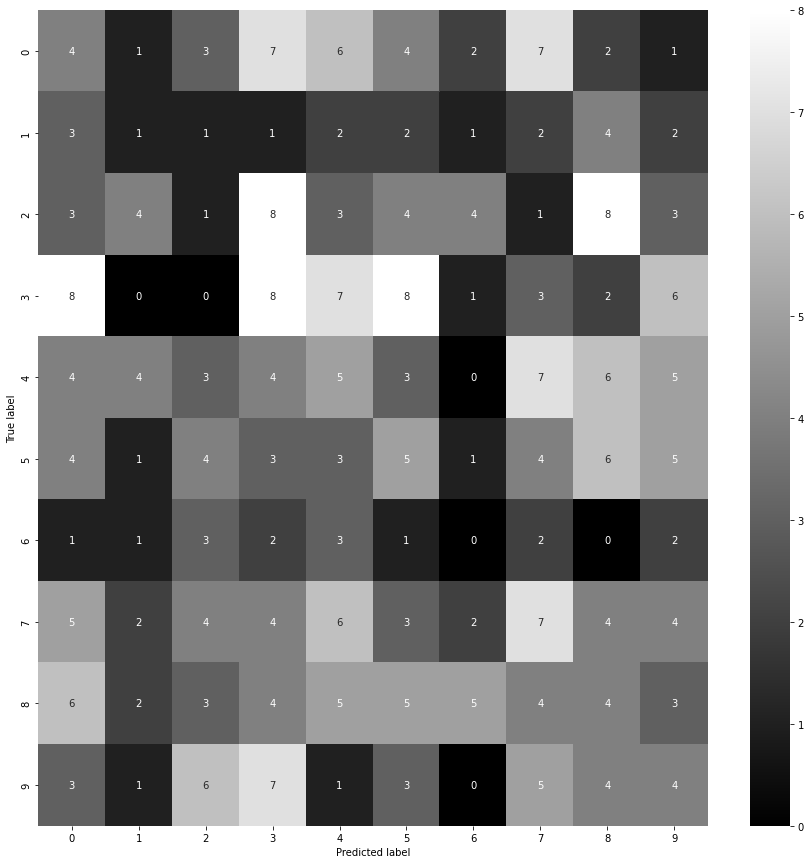

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(15, 15))
sns.heatmap(matrix, annot=True,cmap="gray")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()